In [112]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

### CREATE DATA FRAMES

In [113]:
clinical = pd.read_csv('../data/rauw/illumina/Sample info + Sperm quality.csv')
clinical.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Life style, intake habits, clinical history",...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Sperm DNA integrity,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Sample ID,Sample collection date,City of birth,City of residence 1,City of residence 2,Age,Clinical status,Smoker,Alcohol intake,Caffeine (mg/day),...,pH,Seminal viscosity (cps),Normed sORP (mV/10^6 sperm/ml),CMA3+ (%),TUNEL+ (%),Alkaline comet OTM,Neutral comet OTM,Alkaline comet (%),Neutral comet (%),Shannon Index
1,UAB 17001,2017-07-25 00:00:00,Malaga,[IB] Alcudia,NaN,40,Infertile,0,Sporadic,388,...,7.5,6.3096,0.38149038461538454,50.75,25.79,0.765,0.6,31,82,2.57552
2,UAB 17002,2017-07-12 00:00:00,[IB] Palma,[IB] Palma,NaN,42,Infertile,0,Frequent,156,...,7.5,4.997999999999999,0.6411062836391933,23.25,42.49,0.885,0.595,33,72,3.42725
3,UAB 17003,2017-07-21 00:00:00,[VAL] València,[IB] Palma,NaN,38,Infertile,NaN,NaN,NaN,...,8.4,5.591999999999999,1.2580281690140847,40.85,35.45,0.89,0.625,28,78,2.60476
4,UAB 17004,2017-08-21 00:00:00,[Bulgària] Sliven,[IB] Campos,NaN,48,Infertile,NaN,NaN,NaN,...,8.3,8.6112,NaN,37.25,29.42,1.09,1.105,64,86,2.93109


In [114]:
# Set the second row as the column names
clinical.columns = clinical.iloc[0]

# Drop the first and second rows (index 0 and 1)
clinical = clinical.iloc[1:, :]

# Reset the index
clinical.reset_index(drop=True, inplace=True)
clinical.head(5)

,Sample ID,Sample collection date,City of birth,City of residence 1,City of residence 2,Age,Clinical status,Smoker,Alcohol intake,Caffeine (mg/day),...,pH,Seminal viscosity (cps),Normed sORP (mV/10^6 sperm/ml),CMA3+ (%),TUNEL+ (%),Alkaline comet OTM,Neutral comet OTM,Alkaline comet (%),Neutral comet (%),Shannon Index
0,UAB 17001,2017-07-25 00:00:00,Malaga,[IB] Alcudia,NaN,40,Infertile,0,Sporadic,388,...,7.5,6.3096,0.38149038461538454,50.75,25.79,0.765,0.6,31,82,2.57552
1,UAB 17002,2017-07-12 00:00:00,[IB] Palma,[IB] Palma,NaN,42,Infertile,0,Frequent,156,...,7.5,4.997999999999999,0.6411062836391933,23.25,42.49,0.885,0.595,33,72,3.42725
2,UAB 17003,2017-07-21 00:00:00,[VAL] València,[IB] Palma,NaN,38,Infertile,NaN,NaN,NaN,...,8.4,5.591999999999999,1.2580281690140847,40.85,35.45,0.89,0.625,28,78,2.60476
3,UAB 17004,2017-08-21 00:00:00,[Bulgària] Sliven,[IB] Campos,NaN,48,Infertile,NaN,NaN,NaN,...,8.3,8.6112,NaN,37.25,29.42,1.09,1.105,64,86,2.93109
4,UAB 17005,2017-08-21 00:00:00,Barcelona,[IB] Palma,NaN,39,Infertile,0,Never,0,...,7.7,4.548,NaN,19.5,40.46,1.285,0.26,30,46,2.47794


In [115]:
clinical_lifestyle = clinical.iloc[:, :14]

# Drop the last row
clinical_lifestyle = clinical_lifestyle.iloc[:-1, :]

clinical_lifestyle.head(10)

,Sample ID,Sample collection date,City of birth,City of residence 1,City of residence 2,Age,Clinical status,Smoker,Alcohol intake,Caffeine (mg/day),Radiation exposure,Chemical exposure,Diseases,Antibiotics (last month)
0,UAB 17001,2017-07-25 00:00:00,Malaga,[IB] Alcudia,NaN,40,Infertile,0,Sporadic,388,0,0,NaN,NaN
1,UAB 17002,2017-07-12 00:00:00,[IB] Palma,[IB] Palma,NaN,42,Infertile,0,Frequent,156,0,0,NaN,NaN
2,UAB 17003,2017-07-21 00:00:00,[VAL] València,[IB] Palma,NaN,38,Infertile,NaN,NaN,NaN,1,1,NaN,Yes
3,UAB 17004,2017-08-21 00:00:00,[Bulgària] Sliven,[IB] Campos,NaN,48,Infertile,NaN,NaN,NaN,0,0,NaN,NaN
4,UAB 17005,2017-08-21 00:00:00,Barcelona,[IB] Palma,NaN,39,Infertile,0,Never,0,0,0,NaN,NaN
5,UAB 17006,2017-08-23 00:00:00,[IB] Palma,[IB] Palma,NaN,40,Infertile,NaN,NaN,NaN,0,0,NaN,Yes
6,UAB 17007,2017-08-23 00:00:00,[IB] Calvia,Barcelona,Palma,34,Infertile,1,Sporadic,464,0,0,Asthma,NaN
7,UAB 17008,2017-10-06 00:00:00,[Val] Carcer,[IB] Palma,NaN,47,Infertile,1,Sporadic,369,0,0,Congenital heart disease,NaN
8,UAB 17009,2017-10-10 00:00:00,[Alemania] Braunlingen,[IB] Palma,NaN,46,Infertile,1,Sporadic,268,0,1,"Asthma, hiatal hernia",NaN
9,UAB 17010,2017-10-10 00:00:00,[Alemania] Geldern,[IB] Alcudia,NaN,38,Infertile,1,Frequent,268,0,0,NaN,NaN


In [146]:
clinical_seminogram = clinical.iloc[:, [0] + [6] + list(range(14, 24))]

# Drop the last row
clinical_seminogram = clinical_seminogram.iloc[:-1, :]

clinical_seminogram.head(10)

,Sample ID,Clinical status,Abstinence (days),Volume (mL),Sperm concentration (M/ml),Total sperm number (x10^6),Total motility (%),Progressive motility (%),Normal morfology (%),pH,Seminal viscosity (cps),Normed sORP (mV/10^6 sperm/ml)
0,UAB 17001,Infertile,2,2.3,135652173.9130435,312,20,20,13,7.5,6.3096,0.38149038461538454
1,UAB 17002,Infertile,2,1.3,118623076.92307691,154.21,18.55,18.55,29,7.5,4.997999999999999,0.6411062836391933
2,UAB 17003,Infertile,NaN,2.2,48409090.90909091,106.5,74,74,12,8.4,5.591999999999999,1.2580281690140847
3,UAB 17004,Infertile,NaN,3.7,NaN,NaN,0,NaN,NaN,8.3,8.6112,NaN
4,UAB 17005,Infertile,2,5.7,NaN,NaN,0,NaN,NaN,7.7,4.548,NaN
5,UAB 17006,Infertile,NaN,3.3,14181818.181818184,46.8,13,13,4,8.3,4.3644,0.8496794871794872
6,UAB 17007,Infertile,3,4.7,94234042.55319148,442.9,50,50,5,7.3,NaN,NaN
7,UAB 17008,Infertile,3,0.5,17800000,8.9,24,24,NaN,7.5,7.849199999999999,1.2865168539325842
8,UAB 17009,Infertile,2,2.7,13333333.333333332,36,84,84,NaN,8,5.9748,3.28875
9,UAB 17010,Infertile,2,3.2,13500000,43.2,30,30,2,8.5,4.284,3.9444444444444446


In [117]:
clinical_seminogram.isna().sum()

0
Sample ID                          0
Abstinence (days)                  7
Volume (mL)                        1
Sperm concentration (M/ml)         3
Total sperm number (x10^6)         3
Total motility (%)                 0
Progressive motility (%)           3
Normal morfology (%)              12
pH                                 1
Seminal viscosity (cps)            2
Normed sORP (mV/10^6 sperm/ml)     6
dtype: int64

In [153]:
clinical_sperm_integrity = clinical.iloc[:, [0] + [6] + list(range(24, 31))]

# Drop the last row
clinical_sperm_integrity = clinical_sperm_integrity.iloc[:-1, :]

clinical_sperm_integrity.head(10)

,Sample ID,Clinical status,CMA3+ (%),TUNEL+ (%),Alkaline comet OTM,Neutral comet OTM,Alkaline comet (%),Neutral comet (%),Shannon Index
0,UAB 17001,Infertile,50.75,25.79,0.765,0.6,31,82,2.57552
1,UAB 17002,Infertile,23.25,42.49,0.885,0.595,33,72,3.42725
2,UAB 17003,Infertile,40.85,35.45,0.89,0.625,28,78,2.60476
3,UAB 17004,Infertile,37.25,29.42,1.09,1.105,64,86,2.93109
4,UAB 17005,Infertile,19.5,40.46,1.285,0.26,30,46,2.47794
5,UAB 17006,Infertile,23.25,69.69,1.49,0.595,55,54,1.58201
6,UAB 17007,Infertile,33.56,29.51,1.135,0.59,30,78,1.94317
7,UAB 17008,Infertile,NaN,NaN,1.23,1.295,60,90,2.34287
8,UAB 17009,Infertile,21.92,46.53,0.795,0.63,37,60,2.54868
9,UAB 17010,Infertile,51.35,46.78,0.885,0.71,40,73,3.25087


In [119]:
# count NA values
clinical_sperm_integrity.isna().sum()

0
Sample ID             0
CMA3+ (%)             1
TUNEL+ (%)            2
Alkaline comet OTM    0
Neutral comet OTM     0
Alkaline comet (%)    0
Neutral comet (%)     0
Shannon Index         0
dtype: int64

### ANALYSIS DF LIFESTYLE

In [120]:
# count NA values
clinical_lifestyle.isna().sum()

0
Sample ID                    0
Sample collection date       0
City of birth                0
City of residence 1          0
City of residence 2         45
Age                          0
Clinical status              0
Smoker                       5
Alcohol intake               5
Caffeine (mg/day)            5
Radiation exposure           0
Chemical exposure            0
Diseases                    41
Antibiotics (last month)    44
dtype: int64

In [121]:
# Drop three specific columns not interested in
clinical_lifestyle = clinical_lifestyle.drop(['City of residence 2', 'Diseases', 'Antibiotics (last month)'], axis=1)

In [122]:
# count NA values
clinical_lifestyle.isna().sum()

0
Sample ID                 0
Sample collection date    0
City of birth             0
City of residence 1       0
Age                       0
Clinical status           0
Smoker                    5
Alcohol intake            5
Caffeine (mg/day)         5
Radiation exposure        0
Chemical exposure         0
dtype: int64

In [123]:
# Crate two dataframes depending on the value of ID
clinical_lifestyle_fertil = clinical_lifestyle[clinical_lifestyle['Sample ID'].str.startswith('CON')]
clinical_lifestyle_infertil = clinical_lifestyle[clinical_lifestyle['Sample ID'].str.startswith('UAB')]

In [124]:
# count NA values
print(clinical_lifestyle_infertil.isna().sum())
print(clinical_lifestyle_fertil.isna().sum())

0
Sample ID                 0
Sample collection date    0
City of birth             0
City of residence 1       0
Age                       0
Clinical status           0
Smoker                    5
Alcohol intake            5
Caffeine (mg/day)         5
Radiation exposure        0
Chemical exposure         0
dtype: int64
0
Sample ID                 0
Sample collection date    0
City of birth             0
City of residence 1       0
Age                       0
Clinical status           0
Smoker                    0
Alcohol intake            0
Caffeine (mg/day)         0
Radiation exposure        0
Chemical exposure         0
dtype: int64


In [125]:
# Delete the rows that have NA values
clinical_lifestyle_infertil = clinical_lifestyle_infertil.dropna()

# count NA values
print(clinical_lifestyle_infertil.isna().sum())
print(clinical_lifestyle_fertil.isna().sum())

0
Sample ID                 0
Sample collection date    0
City of birth             0
City of residence 1       0
Age                       0
Clinical status           0
Smoker                    0
Alcohol intake            0
Caffeine (mg/day)         0
Radiation exposure        0
Chemical exposure         0
dtype: int64
0
Sample ID                 0
Sample collection date    0
City of birth             0
City of residence 1       0
Age                       0
Clinical status           0
Smoker                    0
Alcohol intake            0
Caffeine (mg/day)         0
Radiation exposure        0
Chemical exposure         0
dtype: int64


In [126]:
# Count the number of rows of each dataframe
print(clinical_lifestyle_infertil.shape)
print(clinical_lifestyle_fertil.shape)

(37, 11)
(14, 11)


##### TABLES OF CONTINGENCY

In [127]:
categorical_variables = ['Smoker', 'Alcohol intake', 'Radiation exposure', 'Chemical exposure']

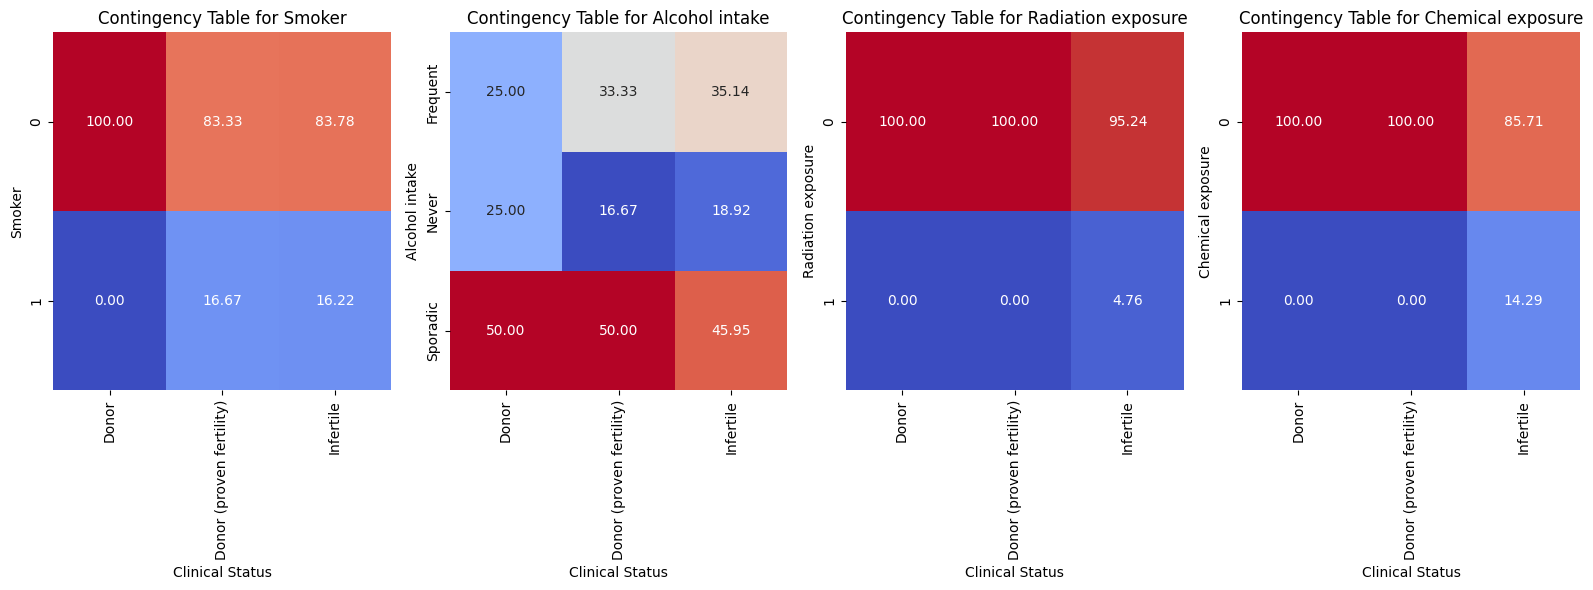

In [128]:
# Create subplots with two columns
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_variables), figsize=(16, 6))

# Iterate over categorical variables
for i, variable in enumerate(categorical_variables):
    # Create a contingency table
    contingency_table = pd.crosstab(index=clinical_lifestyle[variable], columns=clinical_lifestyle['Clinical status'], normalize='columns') * 100
    
    # Plot the contingency table as a heatmap
    sns.heatmap(contingency_table, annot=True, cmap='coolwarm', cbar=False, fmt=".2f", ax=axes[i])
    
    # Set title and labels
    axes[i].set_title(f'Contingency Table for {variable}')
    axes[i].set_xlabel('Clinical Status')
    axes[i].set_ylabel(variable)

# Adjust layout
plt.tight_layout()
plt.show()

VARAIBLE: Smoker

Chi-Square Test for Smoker:

Chi2 Statistic: 29.999999999999993
P-value: 3.0590232050182706e-07



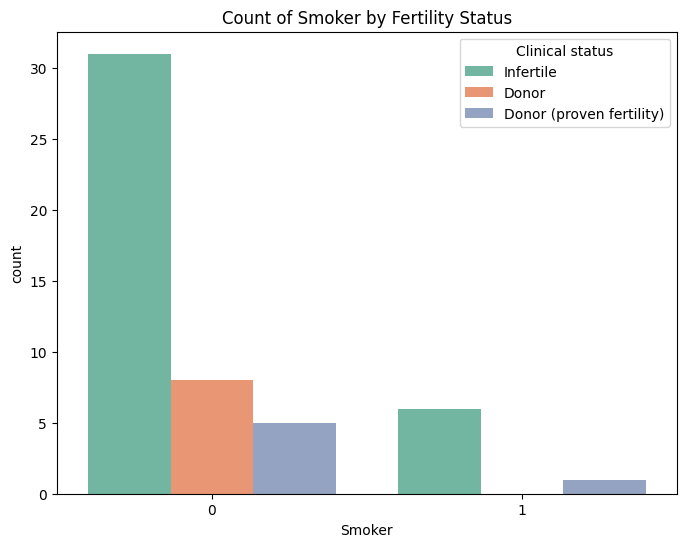

--------------------------------------------------------------
VARAIBLE: Alcohol intake

Chi-Square Test for Alcohol intake:

Chi2 Statistic: 29.999999999999993
P-value: 3.0590232050182706e-07



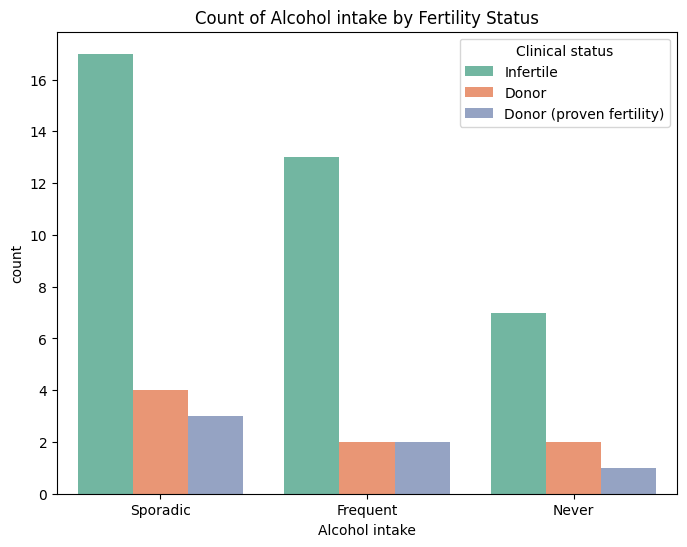

--------------------------------------------------------------
VARAIBLE: Radiation exposure

Chi-Square Test for Radiation exposure:

Chi2 Statistic: 29.999999999999993
P-value: 3.0590232050182706e-07



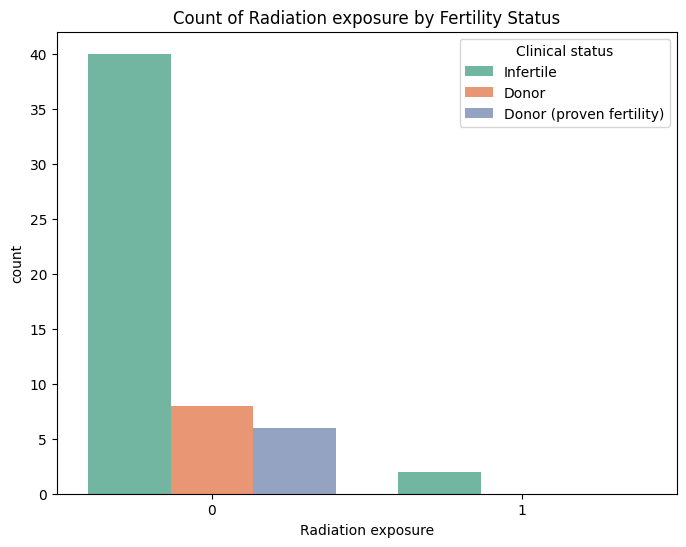

--------------------------------------------------------------
VARAIBLE: Chemical exposure

Chi-Square Test for Chemical exposure:

Chi2 Statistic: 29.999999999999993
P-value: 3.0590232050182706e-07



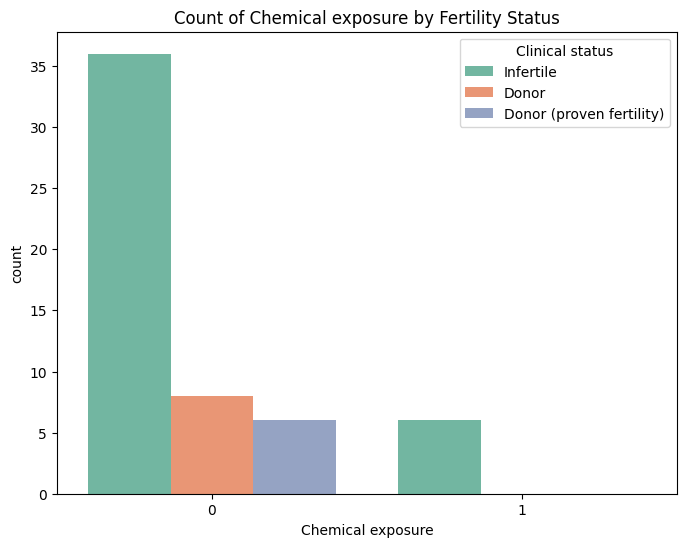

--------------------------------------------------------------


In [129]:
for variable in categorical_variables:
    print("VARAIBLE:", variable)
    # Create contingency table
    contingency_table = pd.crosstab(index=clinical_lifestyle[variable], columns=clinical_lifestyle['Clinical status'], normalize='columns') * 100
    #print(f"\nContingency Table for {variable} (%):\n{contingency_table}\n")

    # Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Square Test for {variable}:\n")
    print(f"Chi2 Statistic: {chi2_stat}")
    print(f"P-value: {p_value}\n")

    # Side-by-Side bar plot (count)
    plt.figure(figsize=(8, 6))
    sns.countplot(x=variable, hue='Clinical status', data=clinical_lifestyle, palette='Set2', dodge=True)
    plt.title(f'Count of {variable} by Fertility Status')
    plt.show()

    print("--------------------------------------------------------------")

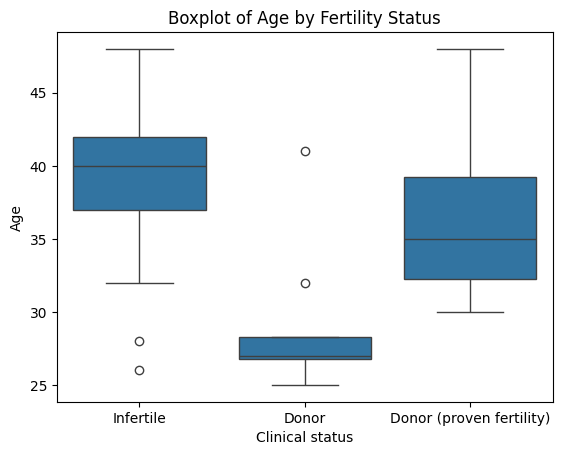

Mann-Whitney U test results: U-statistic = 117.0, p-value = 0.0008125621195897043


In [130]:
# Assuming 'Age' is the column representing the age of men, and 'Clinical status' is the fertility status
age_column = 'Age'
group_column = 'Clinical status'

# Convert 'Age' column to numeric and handle errors by coercing non-numeric values to NaN
clinical_lifestyle[age_column] = pd.to_numeric(clinical_lifestyle[age_column], errors='coerce')

# Create a boxplot to visualize the distribution of ages by fertility status
sns.boxplot(x=group_column, y=age_column, data=clinical_lifestyle)
plt.title('Boxplot of Age by Fertility Status')
plt.show()

# Separate age data for fertile and infertile groups
fertile_age = clinical_lifestyle[clinical_lifestyle['Clinical status'] != 'Infertile']['Age']
infertile_age = clinical_lifestyle[clinical_lifestyle['Clinical status'] == 'Infertile']['Age']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(fertile_age, infertile_age)

print(f'Mann-Whitney U test results: U-statistic = {statistic}, p-value = {p_value}')

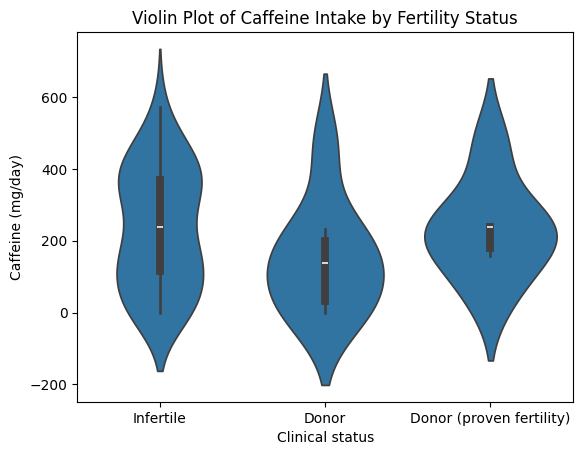

T-test results: t-statistic = -0.9342160833713785, p-value = 0.35477355362775087


In [131]:
# Assuming 'Caffeine (mg/day)' is the column representing the caffeine intake, and 'Clinical status' is the fertility status
caffeine_column = 'Caffeine (mg/day)'
group_column = 'Clinical status'

# Convert 'Caffeine (mg/day)' column to numeric and handle errors by coercing non-numeric values to NaN
clinical_lifestyle[caffeine_column] = pd.to_numeric(clinical_lifestyle[caffeine_column], errors='coerce')

# Create a violin plot to visualize the distribution of caffeine intake by fertility status
sns.violinplot(x=group_column, y=caffeine_column, data=clinical_lifestyle)
plt.title('Violin Plot of Caffeine Intake by Fertility Status')
plt.show()

# Separate caffeine data for fertile and infertile groups
fertile_caffeine = clinical_lifestyle[clinical_lifestyle['Clinical status'] != 'Infertile'][caffeine_column]
infertile_caffeine = clinical_lifestyle[clinical_lifestyle['Clinical status'] == 'Infertile'][caffeine_column]

# Perform the t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(fertile_caffeine, infertile_caffeine, nan_policy='omit')

print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')

##### SEMINOGRAM

In [132]:
# count NA values
clinical_seminogram.isna().sum()

0
Sample ID                          0
Abstinence (days)                  7
Volume (mL)                        1
Sperm concentration (M/ml)         3
Total sperm number (x10^6)         3
Total motility (%)                 0
Progressive motility (%)           3
Normal morfology (%)              12
pH                                 1
Seminal viscosity (cps)            2
Normed sORP (mV/10^6 sperm/ml)     6
dtype: int64

In [140]:
# Create separate DataFrames for fertile and infertile groups
clinical_seminogram_fertil = clinical_seminogram[clinical_seminogram['Sample ID'].str.startswith('CON')]
clinical_seminogram_infertil = clinical_seminogram[clinical_seminogram['Sample ID'].str.startswith('UAB')]

clinical_seminogram_fertil = clinical_seminogram_fertil.dropna()
clinical_seminogram_infertil = clinical_seminogram_infertil.dropna()

T-test results for Volume (mL): t-statistic = 0.08, p-value = 0.9369


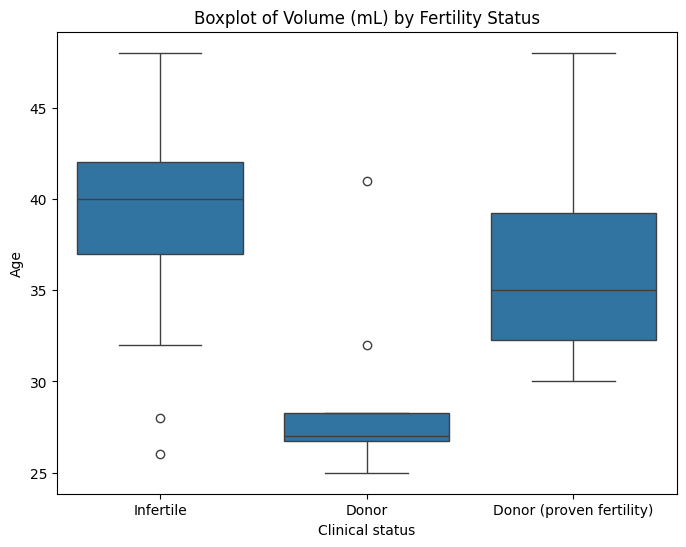

T-test results for Sperm concentration (M/ml): t-statistic = 2.47, p-value = 0.0249


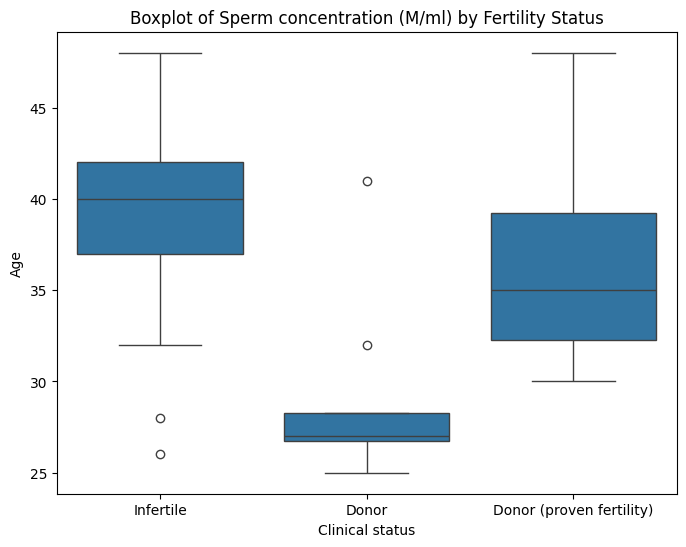

T-test results for Total sperm number (x10^6): t-statistic = 2.60, p-value = 0.0192


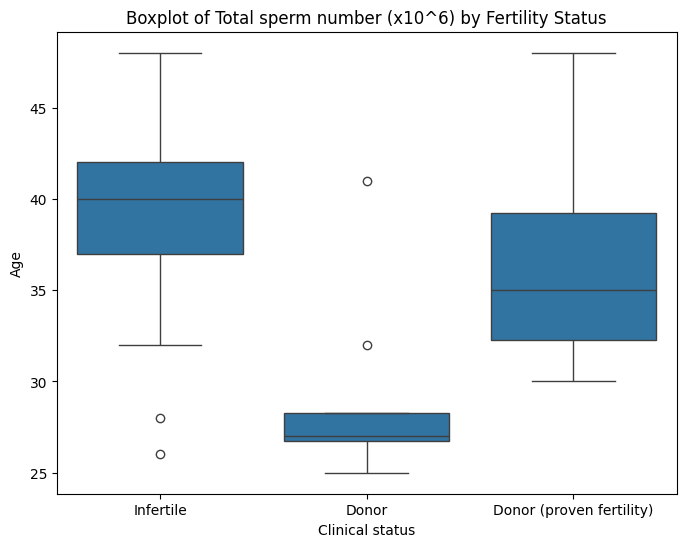

T-test results for Total motility (%): t-statistic = -3.41, p-value = 0.0027


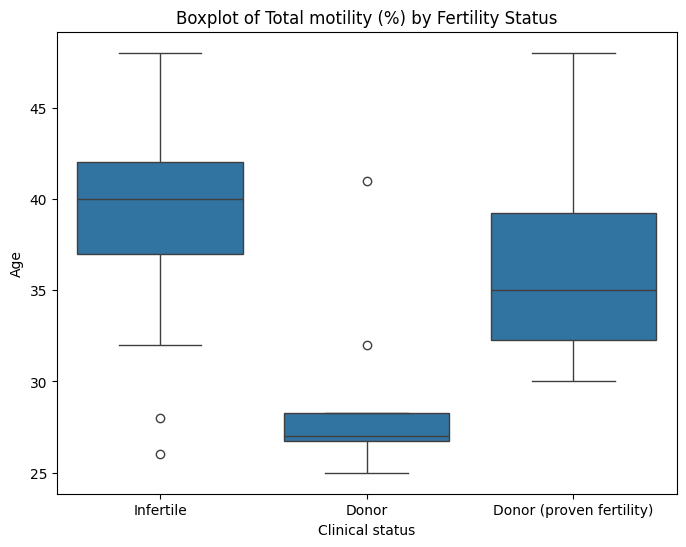

T-test results for Progressive motility (%): t-statistic = -5.63, p-value = 0.0000


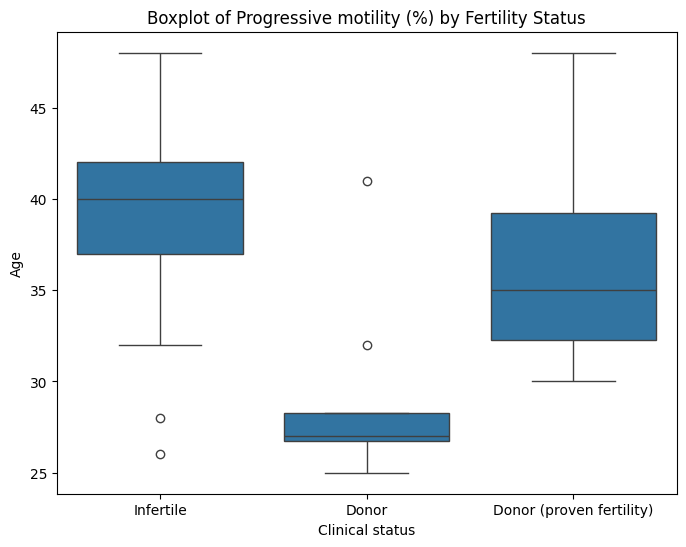

T-test results for Normal morfology (%): t-statistic = 2.15, p-value = 0.0387


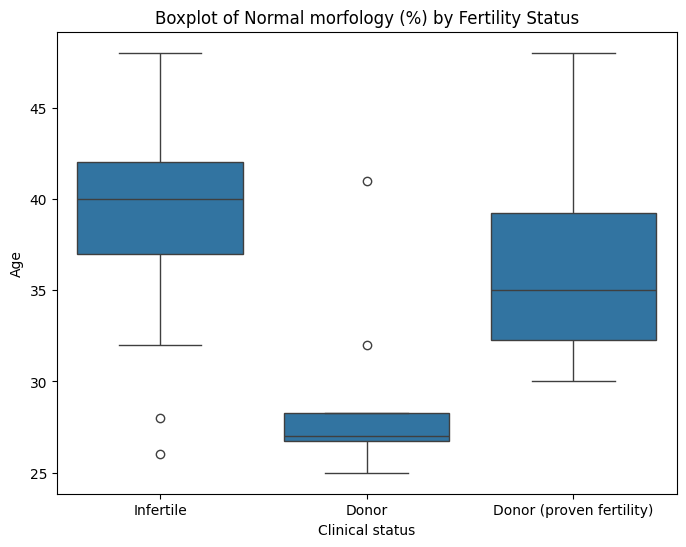

T-test results for pH: t-statistic = 1.33, p-value = 0.1957


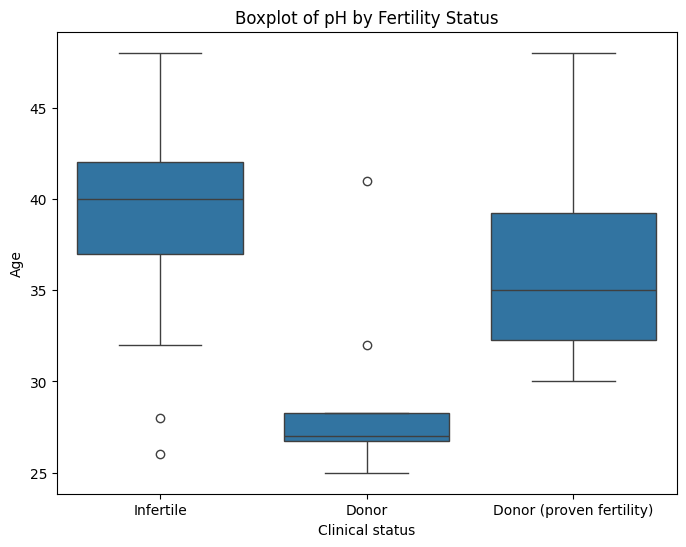

T-test results for Seminal viscosity (cps): t-statistic = 0.10, p-value = 0.9198


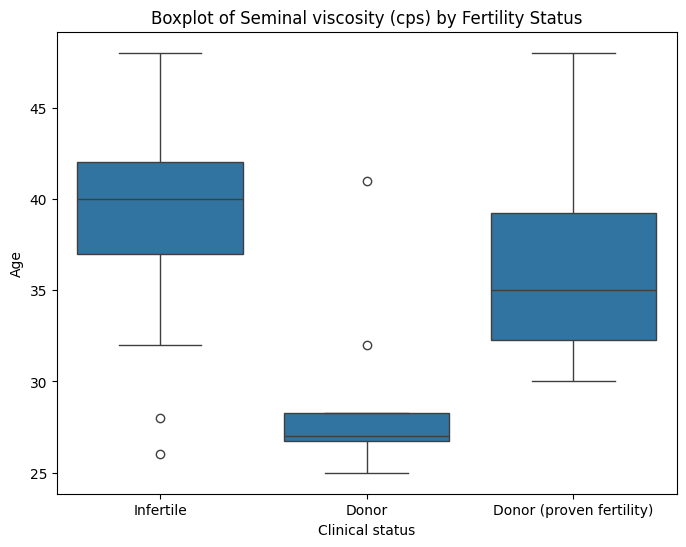

T-test results for Normed sORP (mV/10^6 sperm/ml): t-statistic = -2.49, p-value = 0.0193


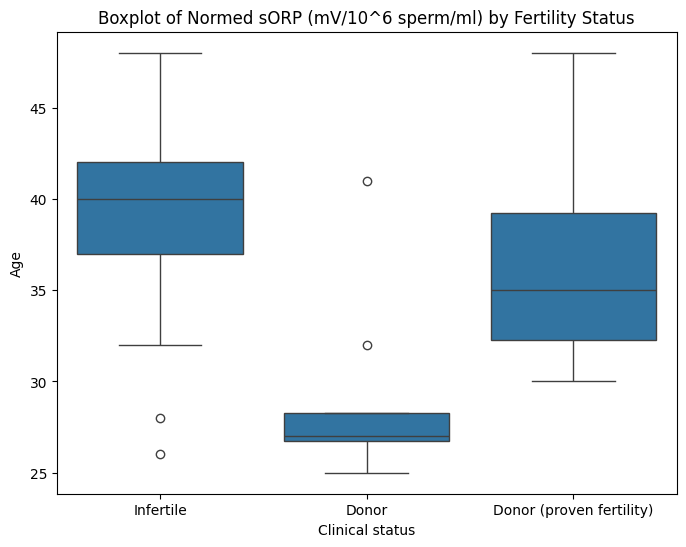

In [151]:
# List of variables
variables = [
    'Volume (mL)',
    'Sperm concentration (M/ml)',
    'Total sperm number (x10^6)',
    'Total motility (%)',
    'Progressive motility (%)',
    'Normal morfology (%)',
    'pH',
    'Seminal viscosity (cps)',
    'Normed sORP (mV/10^6 sperm/ml)'
]

group_column = 'Clinical status'

# Iterate through each variable
for i, variable in enumerate(variables):
    clinical_seminogram_fertil[variable] = pd.to_numeric(clinical_seminogram_fertil[variable], errors='coerce')
    clinical_seminogram_infertil[variable] = pd.to_numeric(clinical_seminogram_infertil[variable], errors='coerce')

    t_stat, p_value = ttest_ind(clinical_seminogram_fertil[variable].dropna(), clinical_seminogram_infertil[variable].dropna(), equal_var=False)
    print(f'T-test results for {variable}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}')

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=group_column, y=age_column, data=clinical_lifestyle)
    plt.title(f'Boxplot of {variable} by Fertility Status')
    plt.show()

##### SPERM INTEGRITY

In [154]:
# count NA values
clinical_sperm_integrity.isna().sum()

0
Sample ID             0
Clinical status       0
CMA3+ (%)             1
TUNEL+ (%)            2
Alkaline comet OTM    0
Neutral comet OTM     0
Alkaline comet (%)    0
Neutral comet (%)     0
Shannon Index         0
dtype: int64

In [155]:
# Create separate DataFrames for fertile and infertile groups
clinical_sperm_integrity_fertil = clinical_sperm_integrity[clinical_sperm_integrity['Sample ID'].str.startswith('CON')]
clinical_sperm_integrity_infertil = clinical_sperm_integrity[clinical_sperm_integrity['Sample ID'].str.startswith('UAB')]

clinical_sperm_integrity_fertil = clinical_sperm_integrity_fertil.dropna()
clinical_sperm_integrity_infertil = clinical_sperm_integrity_infertil.dropna()

T-test results for CMA3+ (%): t-statistic = 2.20, p-value = 0.0376


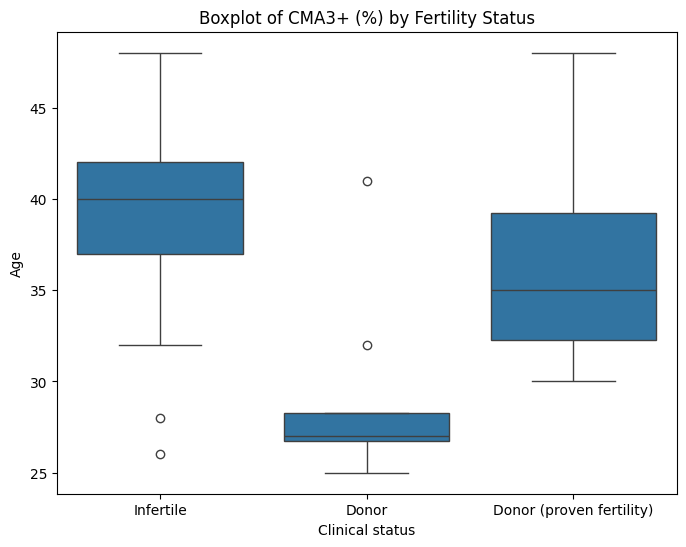

T-test results for TUNEL+ (%): t-statistic = 0.65, p-value = 0.5269


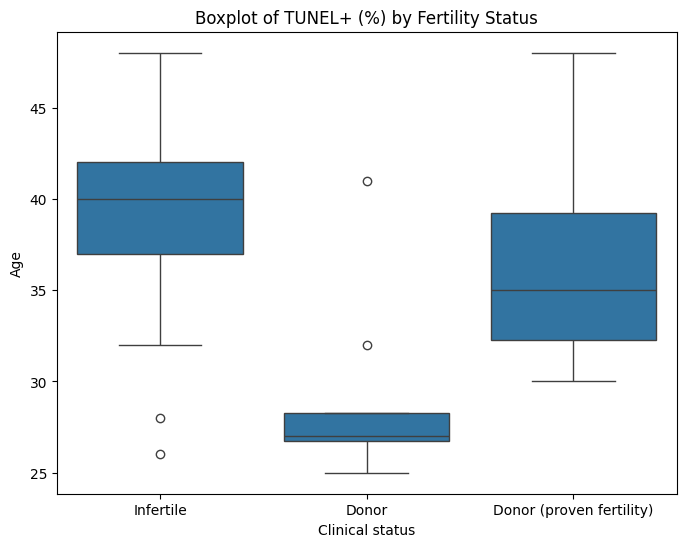

T-test results for Alkaline comet OTM: t-statistic = 1.99, p-value = 0.0644


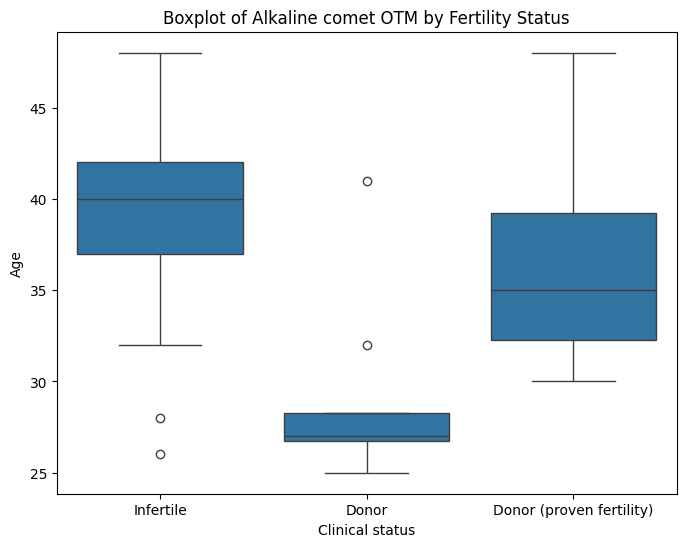

T-test results for Neutral comet OTM: t-statistic = -1.54, p-value = 0.1389


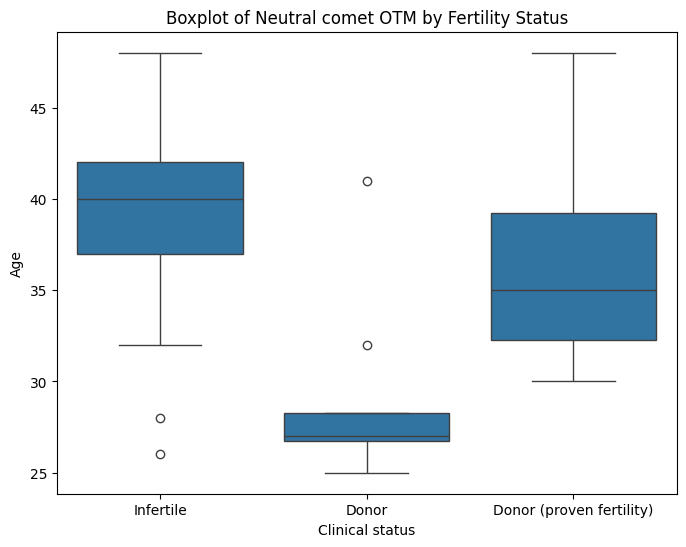

T-test results for Alkaline comet (%): t-statistic = 2.75, p-value = 0.0127


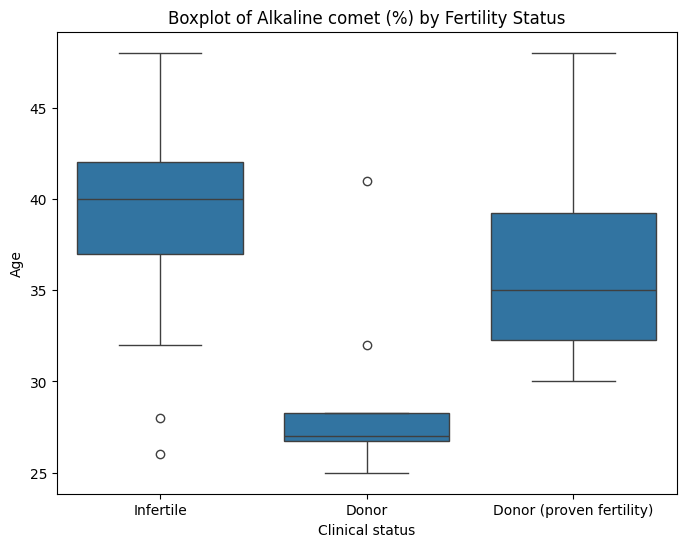

T-test results for Neutral comet (%): t-statistic = -1.85, p-value = 0.0744


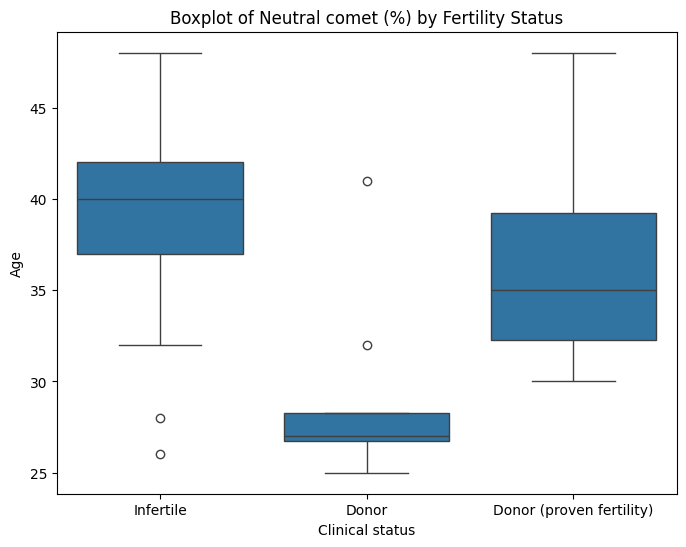

T-test results for Shannon Index: t-statistic = -1.24, p-value = 0.2197


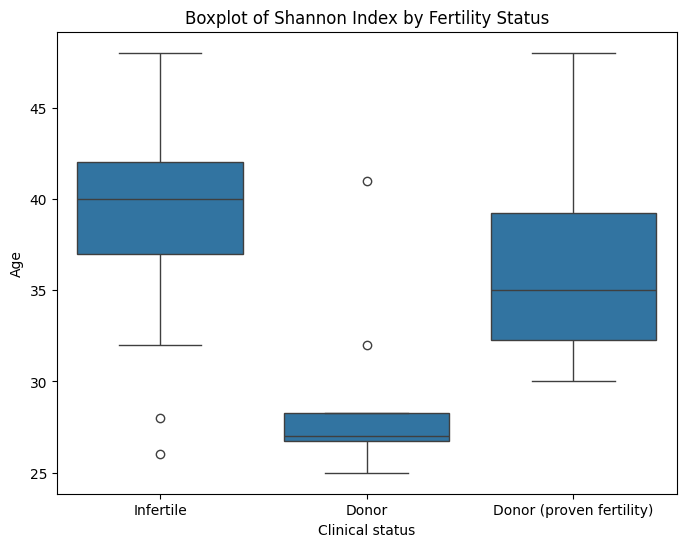

In [158]:
# List of variables
variables = [
    'CMA3+ (%)', 
    'TUNEL+ (%)',
    'Alkaline comet OTM', 
    'Neutral comet OTM', 
    'Alkaline comet (%)',
    'Neutral comet (%)', 
    'Shannon Index'
]

group_column = 'Clinical status'

# Iterate through each variable
for i, variable in enumerate(variables):
    clinical_sperm_integrity_fertil[variable] = pd.to_numeric(clinical_sperm_integrity_fertil[variable], errors='coerce')
    clinical_sperm_integrity_infertil[variable] = pd.to_numeric(clinical_sperm_integrity_infertil[variable], errors='coerce')

    t_stat, p_value = ttest_ind(clinical_sperm_integrity_fertil[variable].dropna(), clinical_sperm_integrity_infertil[variable].dropna(), equal_var=False)
    print(f'T-test results for {variable}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}')

    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=group_column, y=age_column, data=clinical_lifestyle)
    plt.title(f'Boxplot of {variable} by Fertility Status')
    plt.show()